In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image=tf.io.read_file(r'/content/25eac5f9-a206-4d65-b492-7ae42c8b8b68.jpeg')

In [ ]:
image=tf.image.decode_image(image,channels=3)
image=tf.image.convert_image_dtype(image,tf.float32)
image=tf.image.resize(image,[256,256])
image=tf.expand_dims(image,axis=0)

In [ ]:
sobel_x=tf.constant([[-1,0,1],[-2,0,2],[-1,0,1]],dtype=tf.float32)

In [ ]:
sobel_y=tf.constant([[-1,-2,-1],[0,0,0],[1,2,1]],dtype=tf.float32)

In [ ]:
gray_image=tf.image.rgb_to_grayscale(image)


In [ ]:
gx=tf.nn.conv2d(gray_image,tf.expand_dims(tf.expand_dims(sobel_x,axis=-1),axis=-1),strides=[1,1,1,1],padding='SAME')
gy=tf.nn.conv2d(gray_image,tf.expand_dims(tf.expand_dims(sobel_y,axis=-1),axis=-1),strides=[1,1,1,1],padding='SAME')


In [ ]:
gradient_magnitude=tf.sqrt(tf.square(gx)+tf.square(gy))
gradient_magnitude /= tf.reduce_max(gradient_magnitude)

(-0.5, 255.5, 255.5, -0.5)

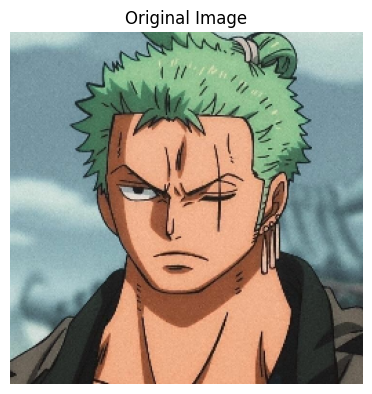

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(image[0])
plt.axis('off')

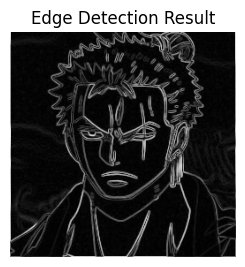

<tf.Tensor: shape=(1, 256, 256, 1), dtype=float32, numpy=
array([[[[1.        ],
         [0.95166254],
         [0.9440287 ],
         ...,
         [0.9411233 ],
         [0.92458254],
         [0.98760295]],

        [[0.9369854 ],
         [0.01961981],
         [0.01335791],
         ...,
         [0.04267747],
         [0.02903631],
         [0.9293352 ]],

        [[0.9361989 ],
         [0.02576292],
         [0.01650753],
         ...,
         [0.04199016],
         [0.02802755],
         [0.9323273 ]],

        ...,

        [[0.44851607],
         [0.02872418],
         [0.01522327],
         ...,
         [0.01135968],
         [0.01653856],
         [0.4538458 ]],

        [[0.4539042 ],
         [0.03122227],
         [0.02265339],
         ...,
         [0.00889452],
         [0.01079329],
         [0.4522548 ]],

        [[0.47598678],
         [0.45276397],
         [0.45255905],
         ...,
         [0.44746402],
         [0.45347038],
         [0.48296627]]]], dty

In [ ]:
plt.subplot(1,2,2)
plt.title('Edge Detection Result')
plt.imshow(tf.squeeze(gradient_magnitude),cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
gradients=tf.image.sobel_edges(image)

In [ ]:
gradients_x=gradients[...,0]# Horizontal gradient
gradients_y=gradients[...,1]# Vertical gradient

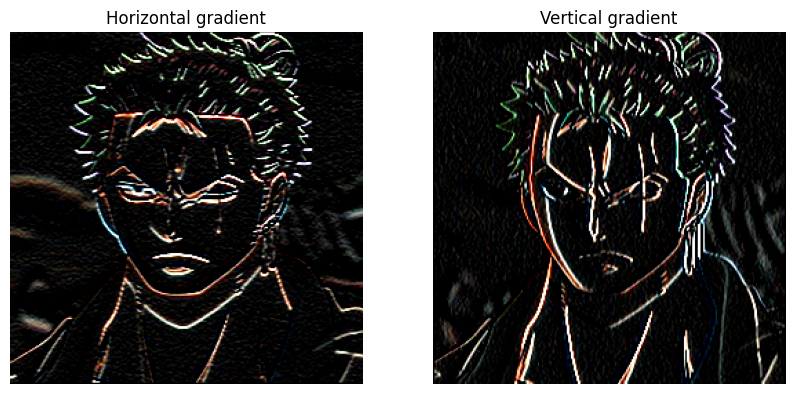

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Horizontal gradient')
plt.imshow(tf.squeeze(gradients_x),cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Vertical gradient')
plt.imshow(tf.squeeze(gradients_y),cmap='gray')
plt.axis('off')
plt.show()